In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA UNDERSTANDING AND PREPROCESSING

Basic Data Exploration

Operations:

    1. Checked data types, column names, and unique values.
    
    2. Verified there were no missing values in the dataset.

In [38]:
df = pd.read_csv(r"datasets\raw.csv")

# Additional data exploration beyond what was shown
# Check data types and verify no unexpected values
print(df['Neighborhood_Quality'].unique())
print(df.columns)

['Average' 'Excellent' 'Good' 'Poor']
Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')


In [39]:
# Create derived features that might be helpful
df['Age'] = 2025 - df['Year_Built']  # Current year minus year built
df['Price_Per_SqFt'] = df['House_Price'] / df['Square_Footage']

In [40]:
df.head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Age,Price_Per_SqFt
0,1360,2,1,1981,0.599637,0,Average,2.623829e+05,44,192.928568
1,4272,3,3,2016,4.753014,1,Average,9.852609e+05,9,230.632222
2,3592,1,2,2016,3.634823,0,Excellent,7.779774e+05,9,216.586133
3,966,1,2,1977,2.730667,1,Good,2.296989e+05,48,237.783560
4,4926,2,1,1993,4.699073,0,Good,1.041741e+06,32,211.478047


Data Cleaning Verification

In [41]:
def outliers(df, column):
    Q1 = np.percentile(df[column], 25) 
    Q3 = np.percentile(df[column], 75) 

    IQR=Q3-Q1

    LF= Q1-1.5*(IQR)
    UF= Q3+1.5*(IQR)

    outlier=df[(df[column]>UF) & (df[column]<LF)]
    return outlier 

for i in df.columns:
    if(df[i].dtypes in ("int64","float64")):
        print(f"Number of {i} outliers: {len(outliers(df,i))}")

Number of Square_Footage outliers: 0
Number of Num_Bedrooms outliers: 0
Number of Num_Bathrooms outliers: 0
Number of Year_Built outliers: 0
Number of Lot_Size outliers: 0
Number of Garage_Size outliers: 0
Number of House_Price outliers: 0
Number of Age outliers: 0
Number of Price_Per_SqFt outliers: 0


Conclusions:

    1.The dataset is clean, with no missing values.

    2.The Neighborhood_Quality column is categorical, while other columns are numerical.

    3.Derived features like Age (based on Year_Built) and Price_Per_SqFt (based on Square_Footage and House_Price) can provide additional insights.

UNIVARIATE ANALYSIS

Numerical Features Distribution

Operations:

    1.Analyzed statistical summaries (mean, median, standard deviation, skewness, kurtosis).

    2.Plotted histograms for numerical features.



In [42]:
# Statistical summary with additional metrics

numerical_features=['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms','Year_Built', 'Lot_Size', 'Garage_Size', 'House_Price']

for feature in numerical_features:
    print(f"\nSummary for {feature}:")
    summary = pd.DataFrame({
        'Mean': [np.mean(df[feature])],
        'Median': [np.median(df[feature])],
        'Std Dev': [np.std(df[feature])],
        'Skewness': [df[feature].skew()],
        'Kurtosis': [df[feature].kurt()],
        'Min': [np.min(df[feature])],
        'Max': [np.max(df[feature])]
    })
    print(summary)


Summary for Square_Footage:
       Mean  Median      Std Dev  Skewness  Kurtosis  Min   Max
0  2815.422  2862.5  1254.887006 -0.066001 -1.128061  503  4999

Summary for Num_Bedrooms:
   Mean  Median  Std Dev  Skewness  Kurtosis  Min  Max
0  2.99     3.0  1.42685  0.025884 -1.333604    1    5

Summary for Num_Bathrooms:
    Mean  Median   Std Dev  Skewness  Kurtosis  Min  Max
0  1.973     2.0  0.819921  0.049917 -1.512391    1    3

Summary for Year_Built:
      Mean  Median    Std Dev  Skewness  Kurtosis   Min   Max
0  1986.55  1986.0  20.622597 -0.021254 -1.185454  1950  2022

Summary for Lot_Size:
       Mean   Median   Std Dev  Skewness  Kurtosis       Min       Max
0  2.778087  2.80974  1.297254 -0.044288 -1.200895  0.506058  4.989303

Summary for Garage_Size:
    Mean  Median   Std Dev  Skewness  Kurtosis  Min  Max
0  1.022     1.0  0.814565   -0.0404 -1.493259    0    2

Summary for House_Price:
            Mean        Median        Std Dev  Skewness  Kurtosis  \
0  618861.01864

In [43]:
# Set up visualization style

sns.set_style('whitegrid')
sns.set_palette("Set2")

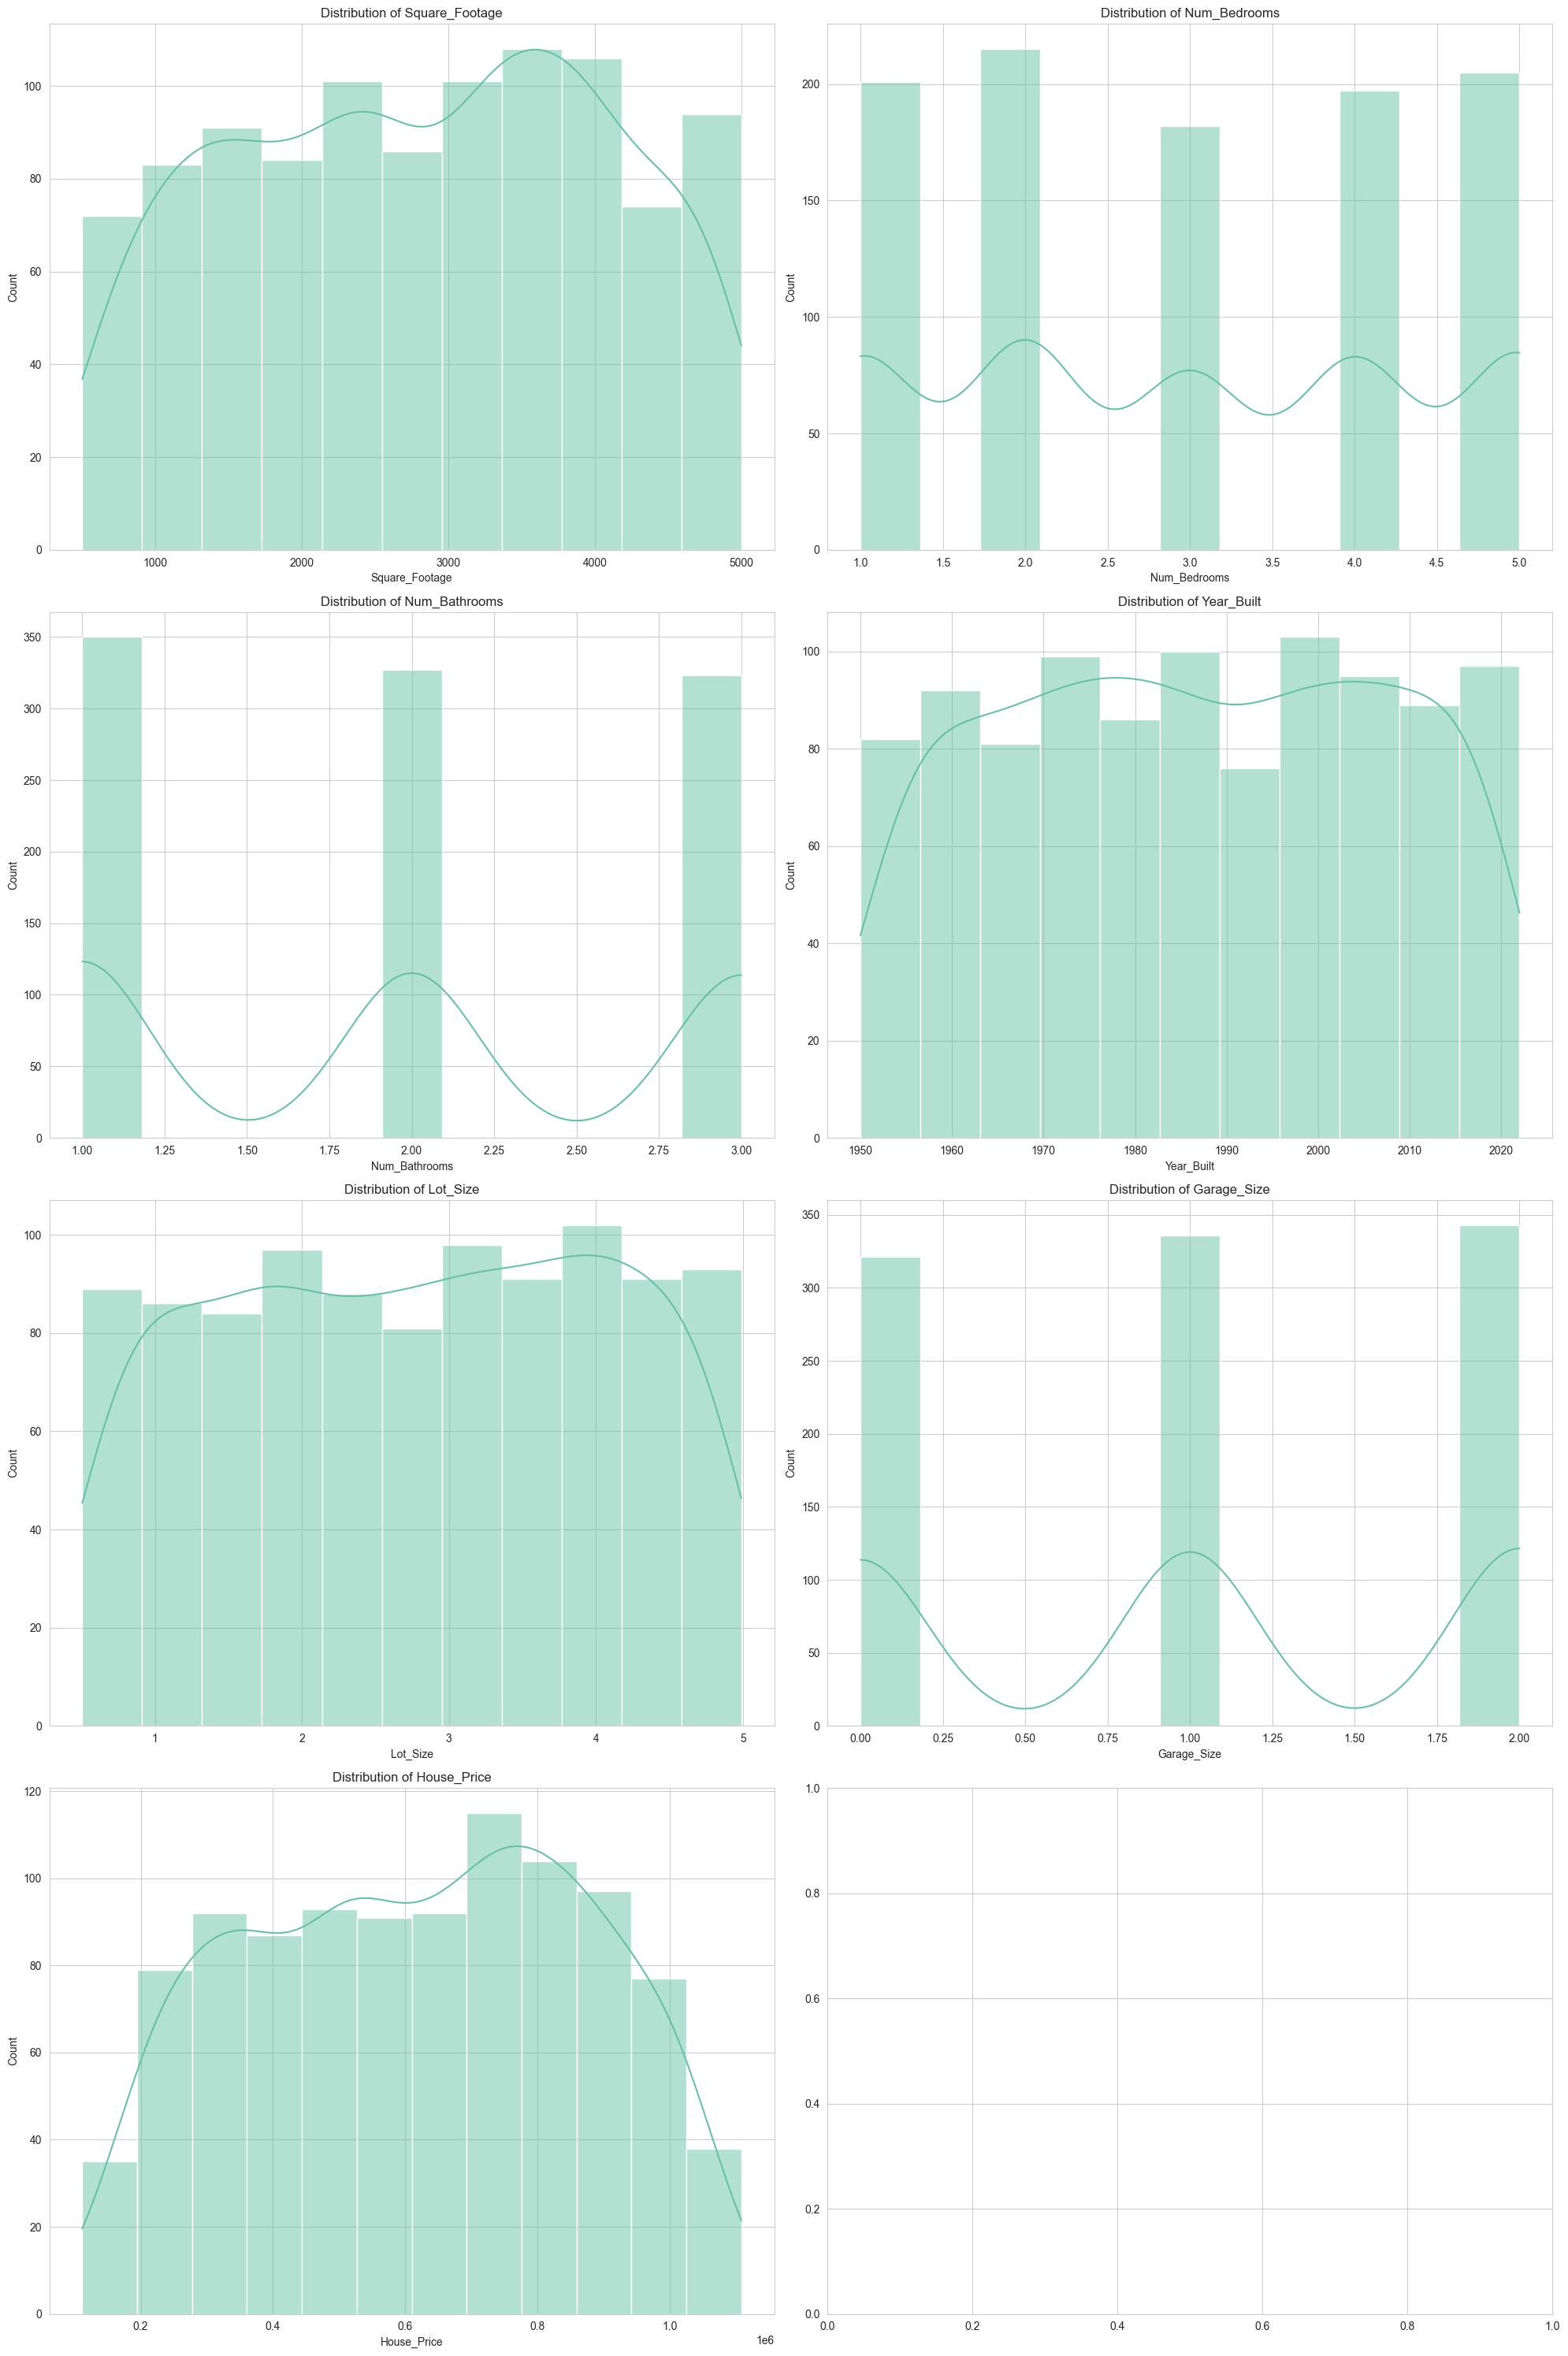

In [44]:
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        sns.histplot(df[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        
plt.tight_layout()
plt.show()

Conclusions:

    1.Square Footage: Right-skewed distribution; most houses are smaller in size, with a few very large properties.

    2.Number of Bedrooms/Bathrooms: Most houses have 2–4 bedrooms and 1–3 bathrooms.

    3.Year Built: Majority of houses were built after 1950, with a peak in recent decades.

    4.Lot Size: Highly skewed; most houses have small lots, but a few have very large ones.

    5.House Price: Right-skewed; most houses fall within a moderate price range, with some high-value outliers.

    6.Skewness in key features suggests potential need for transformations during modeling.